In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import chi2

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['churn-data_preprocess_1.csv']))

Saving churn-data_preprocess_1.csv to churn-data_preprocess_1.csv


In [ ]:
data = df.drop(df.columns[0], axis=1)

In [ ]:
data.isnull().sum()

area                40
user_months          0
new_user             0
phones_used          1
models_used          1
handset_price      847
handset_age          1
refurb_or_new        1
dualband             1
web_capable      10189
manual_limit         0
PRIZM_code        7388
credit_card       1732
cred_score           0
churn                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


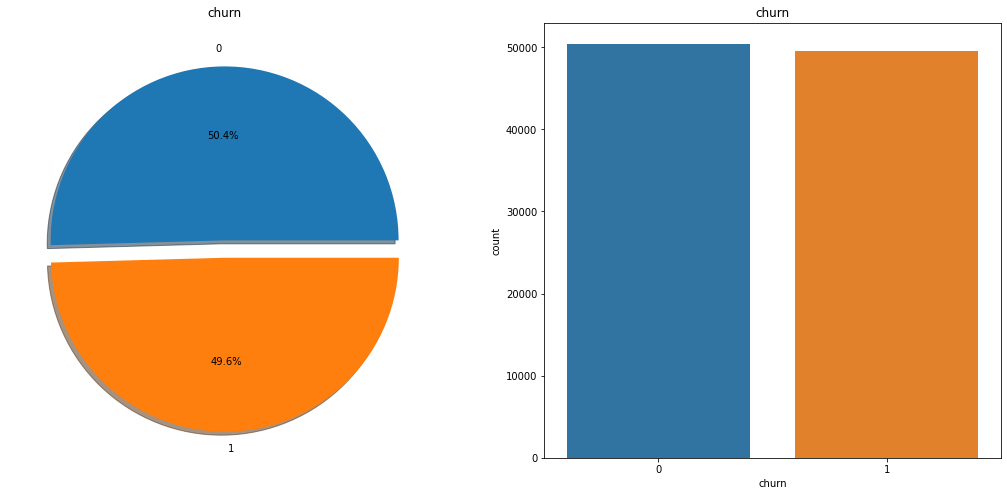

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=data,ax=ax[1])
ax[1].set_title('churn')
plt.show()

In [ ]:
data.groupby(['area','churn'])['churn'].count()

area                           churn
ATLANTIC SOUTH AREA            0        3129
                               1        3003
CALIFORNIA NORTH AREA          0        2832
                               1        3081
CENTRAL/SOUTH TEXAS AREA       0        2242
                               1        2057
CHICAGO AREA                   0        2595
                               1        2546
DALLAS AREA                    0        2781
                               1        2645
DC/MARYLAND/VIRGINIA AREA      0        3544
                               1        3023
GREAT LAKES AREA               0        2434
                               1        2215
HOUSTON AREA                   0        2279
                               1        2062
LOS ANGELES AREA               0        3330
                               1        3306
MIDWEST AREA                   0        3433
                               1        2913
NEW ENGLAND AREA               0        2631
                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


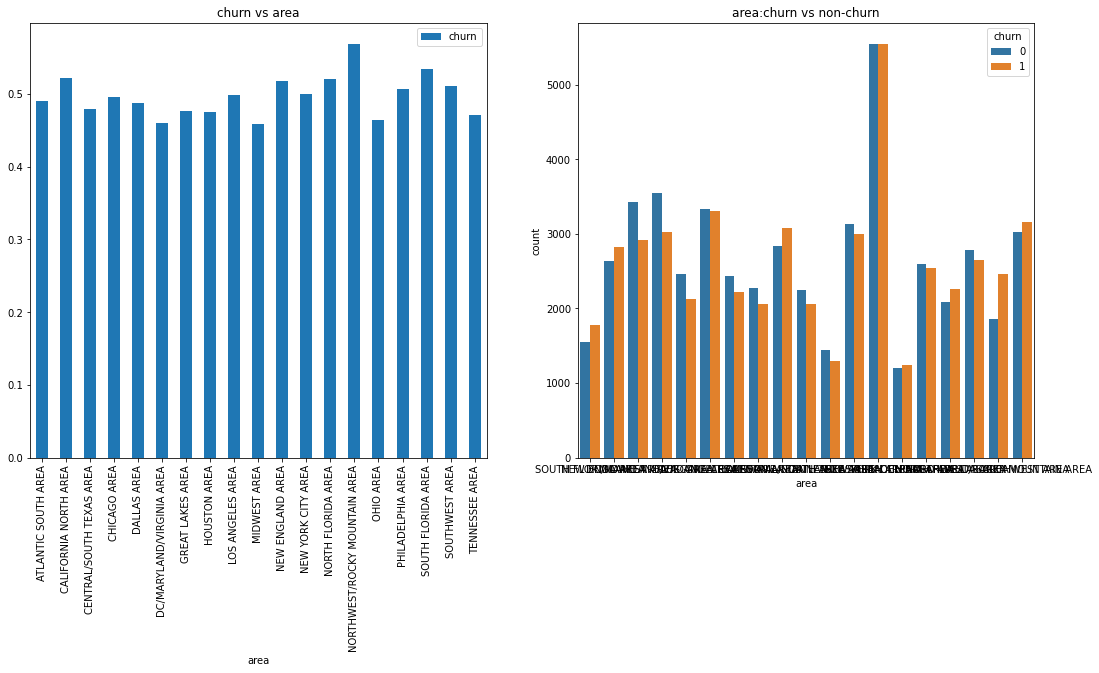

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['area','churn']].groupby(['area']).mean().plot.bar(ax=ax[0])
ax[0].set_title('churn vs area')
sns.countplot('area',hue='churn',data=data,ax=ax[1])
ax[1].set_title('area:churn vs non-churn')
plt.show()

In [ ]:
pd.crosstab(data.cred_score,data.churn,margins=True).style.background_gradient(cmap='summer_r')

churn,0,1,All
cred_score,,,
A,8204,8792,16996
A2,331,530,861
A3,1,2,3
AA,18047,18462,36509
B,1955,2155,4110
B2,51,58,109
BA,6064,6603,12667
C,758,698,1456
C2,95,85,180


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


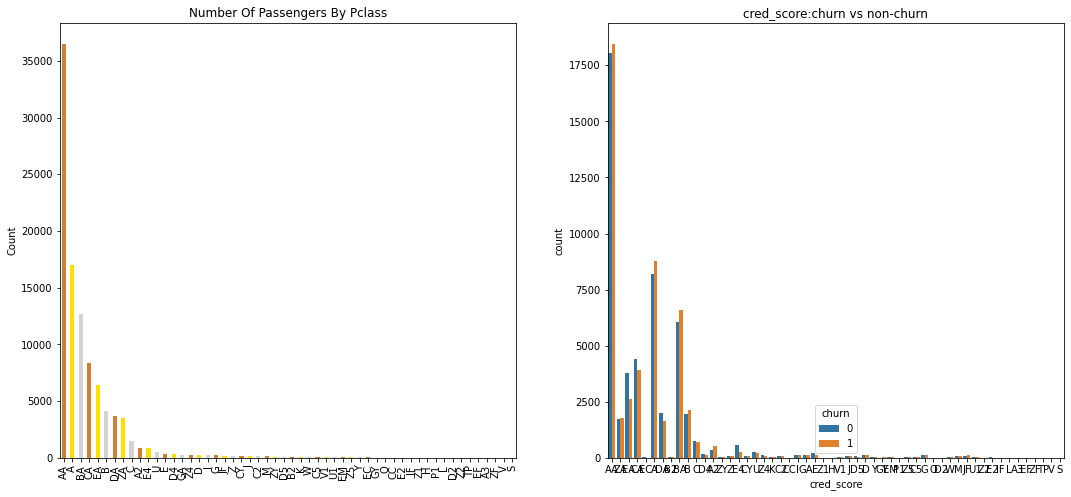

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['cred_score'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('cred_score',hue='churn',data=data,ax=ax[1])
ax[1].set_title('cred_score:churn vs non-churn')
plt.show()

In [ ]:
sns.factorplot('cred_score','churn',hue='Sex',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


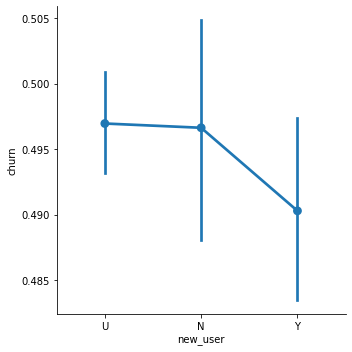

In [ ]:
sns.factorplot('new_user','churn',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


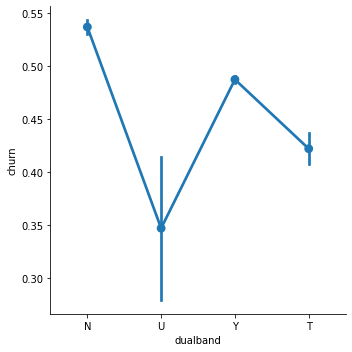

In [ ]:
sns.factorplot('dualband','churn',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


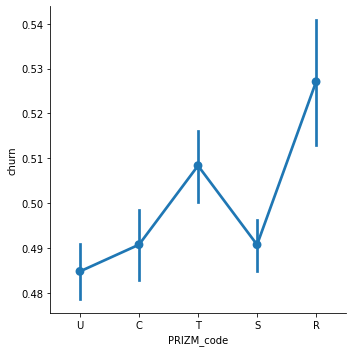

In [ ]:
sns.factorplot('PRIZM_code','churn',data=data)
plt.show()

In [ ]:
print('Highest user_months was:',data['user_months'].max())
print('Lowest user_months was:',data['user_months'].min())
print('Average user_months was:',data['user_months'].mean())

Highest user_months was: 61
Lowest user_months was: 6
Average user_months was: 18.83399


In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()